In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [2]:
df = pd.read_csv("tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.shape

(244, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df1= pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [8]:
corr_matrix = df1.corr()
print(corr_matrix["tip"].sort_values(ascending=False))

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
sex_Male      0.088862
smoker_Yes    0.005929
day_Sat      -0.002790
day_Thur     -0.095879
time_Lunch   -0.121629
Name: tip, dtype: float64


In [9]:
X = df1.drop("tip", axis=1)
y = df1["tip"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

In [13]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R^2: {r2:.2f}")

Linear Regression - MSE: 0.70, R^2: 0.44
Ridge - MSE: 0.70, R^2: 0.44
Lasso - MSE: 0.59, R^2: 0.53
Decision Tree - MSE: 1.27, R^2: -0.02
Random Forest - MSE: 0.92, R^2: 0.26
Support Vector Regression - MSE: 0.53, R^2: 0.57
KNN - MSE: 0.88, R^2: 0.30


In [14]:
#Insights for Management:
#1. Prioritize high-bill tables with personalized service to maximize tips.  
#2. Schedule experienced staff during peak times and use promotions for off-peak hours.  
#3. Encourage group reservations with special deals for higher total tips.  
#4. Tailor service for demographic preferences to boost customer satisfaction.  
#5. Train servers to upsell add-ons to increase total bills and tips.  
#6. Emphasize quick service at lunch and a quality experience at dinner.  
#7. Use predictive insights to identify high-tip tables and incentivize top service.

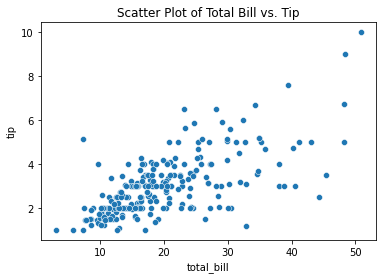

In [15]:
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.show()

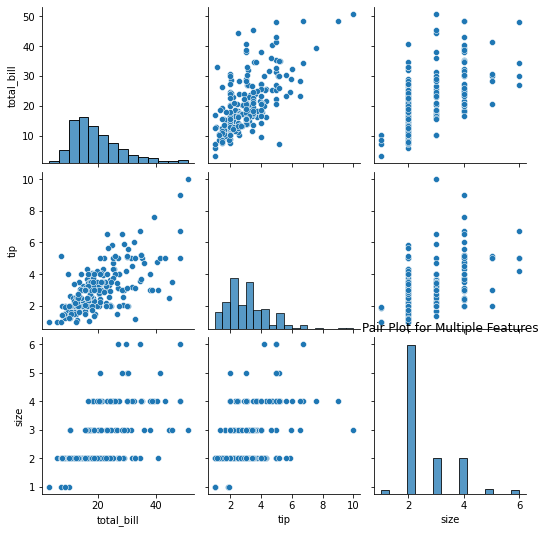

In [16]:
sns.pairplot(df)
plt.title("Pair Plot for Multiple Features")
plt.show()

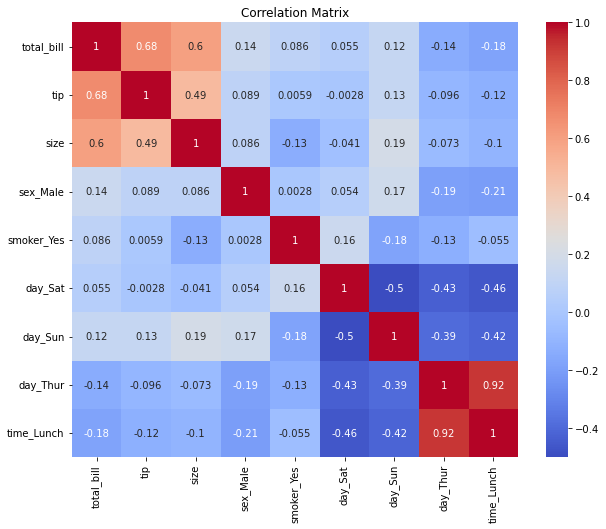

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [18]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test - Statistic: {rainbow_stat:.3f}, p-value: {rainbow_p_value:.3f}")

Rainbow Test - Statistic: 1.197, p-value: 0.166


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


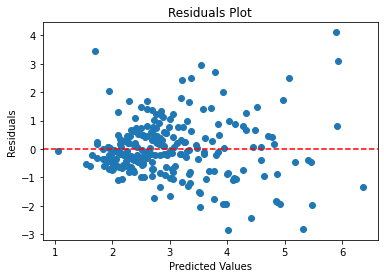

In [19]:
y_pred = model.predict(X_sm)
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()